## Import Modules

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
%matplotlib inline

## Read the Dataset

In [5]:
data = pd.read_csv("../Processed Data/crop_recommendation.csv")

In [6]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,81,40,39,20.879744,82.002744,6.502985,202.935536,rice
1,87,57,44,21.770462,80.319644,7.038096,226.655537,rice
2,76,37,37,23.004459,82.320763,7.840207,263.964248,rice
3,79,40,39,26.491096,80.158363,6.980401,242.864034,rice
4,79,48,37,20.130175,81.604873,7.628473,262.717340,rice


The dataset above allows the users to build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters.

Data fields:

1. **N** - Nitrogen content in soil (kg/hectare)
2. **P** - Phosphorous content in soil (kg/hectare)
3. **K** - Potassium content in soil (kg/hectare)
4. **temperature** - temperature in degree celsius
5. **humidity** - relative humidity in %
6. **ph** - ph value of the soil
7. **rainfall** - rainfall in cm

In [7]:
data.shape

(13450, 8)

In [8]:
data.size

107600

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13450 entries, 0 to 13449
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            13450 non-null  int64  
 1   P            13450 non-null  int64  
 2   K            13450 non-null  int64  
 3   temperature  13450 non-null  float64
 4   humidity     13450 non-null  float64
 5   ph           13450 non-null  float64
 6   rainfall     13450 non-null  float64
 7   label        13450 non-null  object 
dtypes: float64(4), int64(3), object(1)
memory usage: 840.8+ KB


The data has 13450 rows and 8 columns. All the values are numerical except for the label column which is categorical

In [10]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,13450.000000,13450.000000,13450.000000,13450.000000,13450.000000,13450.000000,13450.000000
mean,62.492045,52.491227,51.786766,27.114623,70.838691,6.557550,99.486083
std,42.103103,28.641551,45.194177,20.917747,20.015493,0.774415,74.245740
min,-10.000000,5.000000,5.000000,0.079000,8.005000,3.504752,7.506000
25%,30.000000,31.000000,23.000000,20.002642,61.741500,6.084009,45.228000
50%,56.000000,50.000000,41.000000,25.223500,71.346000,6.519890,80.968653
75%,90.000000,67.000000,59.000000,28.792500,87.357500,6.979898,131.947750
max,215.000000,145.000000,225.000000,249.380000,99.999000,9.973000,599.119000


If we observe the mean and median (i.e. 50th percentile) for all parameters, are almost similar. Hence, scaling is not required.

In [11]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

This shows that there are no null values in the dataset

In [12]:
# value count for crop column

data['label'].value_counts()

jambun(syzygiumcumini)    150
sweetpotato               150
rapeseed(mohri)           150
garlic                    150
cucumber                  150
                         ... 
tobacco                   100
blackgram                 100
apple                     100
pigeonpeas                100
cotton                    100
Name: label, Length: 100, dtype: int64

In [13]:
# Checking how many unique values are there in the dataset

data.apply(lambda x: len(x.unique()))

N                225
P                141
K                139
temperature    11519
humidity       10249
ph              6097
rainfall       12524
label            100
dtype: int64

1. We can see that we have data for 100 unique crops from the label column.
2. The N, P, K values are almost similar everytime since that is the defined amout of nutrients crops need to grow, unlike temperature, humidity, ph, rainfall.
3. ph varies in small ranges so the number of unique values are comparatively lesser than other weather variables.
4. Weather variables like temperature, humidity, and rainfall have a larger range in which the crops can grow properly hence we see more unique values for these variables.

Overall we don't have a lot of repetition of data, so our dataset is not biased and offers good variety for building the model.

## Exploratory Data Analysis

### Count plot

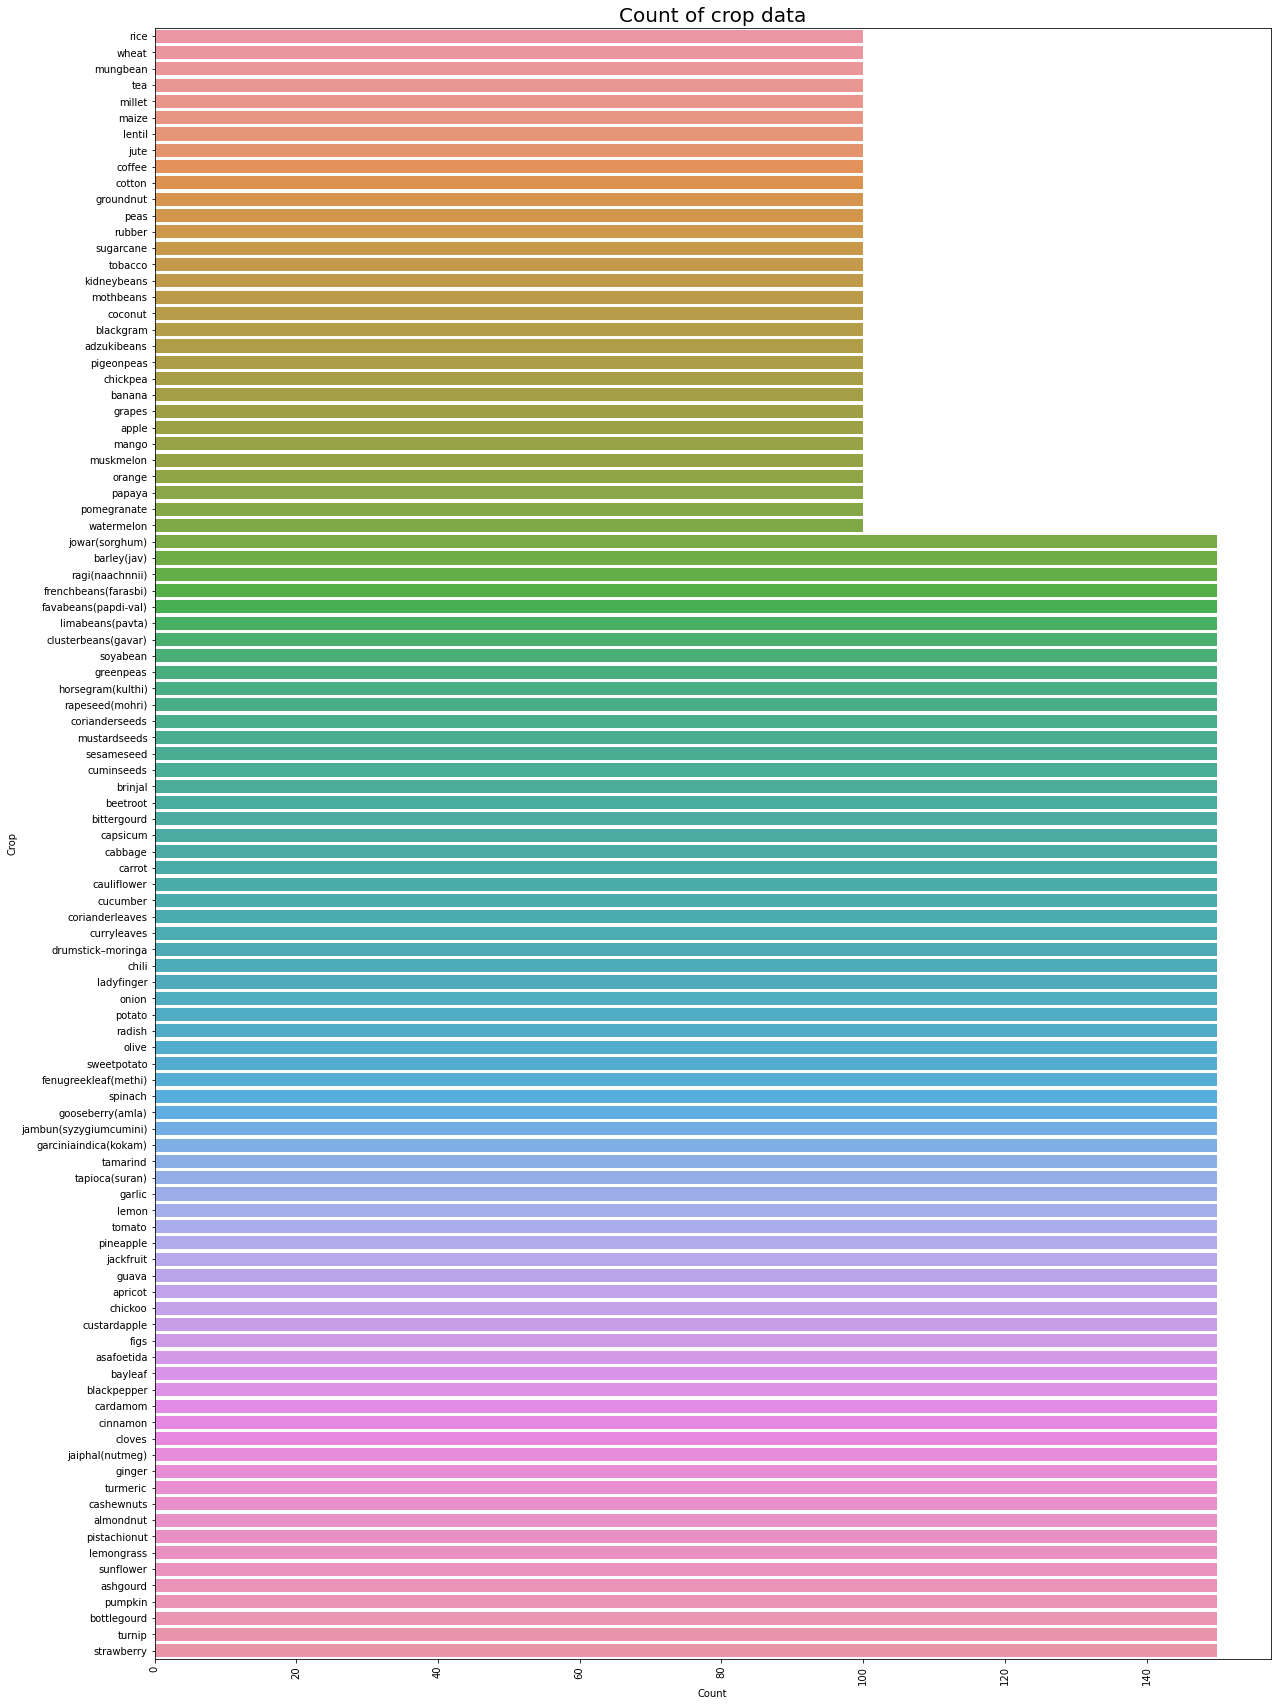

In [16]:
# a count plot to see how many data values are there per crop

fig, ax = plt.subplots(1, 1, figsize=(20, 30))
sns.countplot(data=data, y='label')
ax.set(xlabel='Count')
ax.set(ylabel='Crop')

#xticks is used to specify the x label will be shown at what angle
plt.xticks(rotation=90)

plt.title('Count of crop data', fontsize=20, c='black')
plt.show()

We can see that some crops have 100 readings and most of them have 150

### Heatmap to check correlation between features

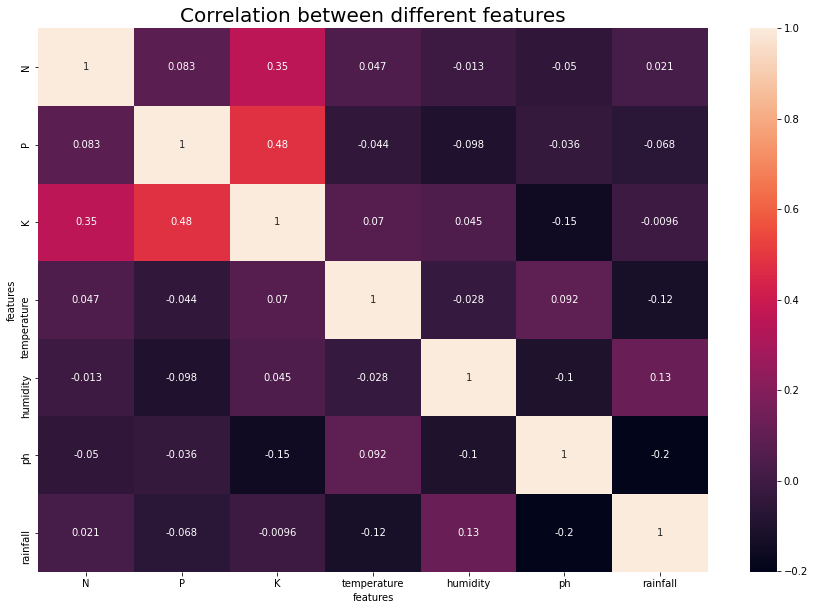

In [17]:
# checking correlation between different features

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize=20, c='black')
plt.show()

Inferences from the correlation heatmap:

**1. P and K have a high correlation - 0.48**

Studies show that, high phosphorous fertilizer applications or content in soil may induce a greater potassium requirement. Hence they both are positively correlated even in the data.

**2. N and K also have a pretty high correlation - 0.35**

Studies show that, high nitrogen fertilizer applications or content in soil may induce a greater potassium requirement. Hence they both are positively correlated even in the data.

**3. Rainfall and Humidity have some significant correlation - 0.13**

Humidity is water vapour in the air. When it rains, it will increase the relative humidity because of the evaporation. So regions where rainfall is high, humidity is high and hence both these features affect the crop yield. Hence this correlation seems fair as per our data and real facts.

**4. There is low correlation between other features**

### Distplot to check distribution of data for all features

<AxesSubplot:xlabel='P', ylabel='Density'>

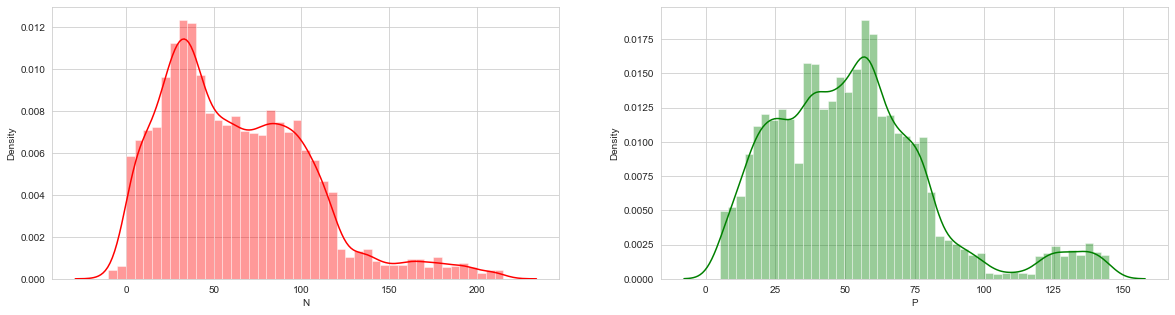

In [18]:
# checking distribution plots for all features to see how data is distributed
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings("ignore")

f = plt.figure(figsize=(20,5))
ax = f.add_subplot(1, 2, 1)
sns.distplot(data['N'], color='red', ax=ax)

ax = f.add_subplot(1, 2, 2)
sns.distplot(data['P'], color='green', ax=ax)

Observations:

- N data is left-skewed. Most of the values lie between 20-120 kg/hectare
- P data: Most values lie between 20-77 kg/hectare and there are some data points between 122-140 kg/hectare

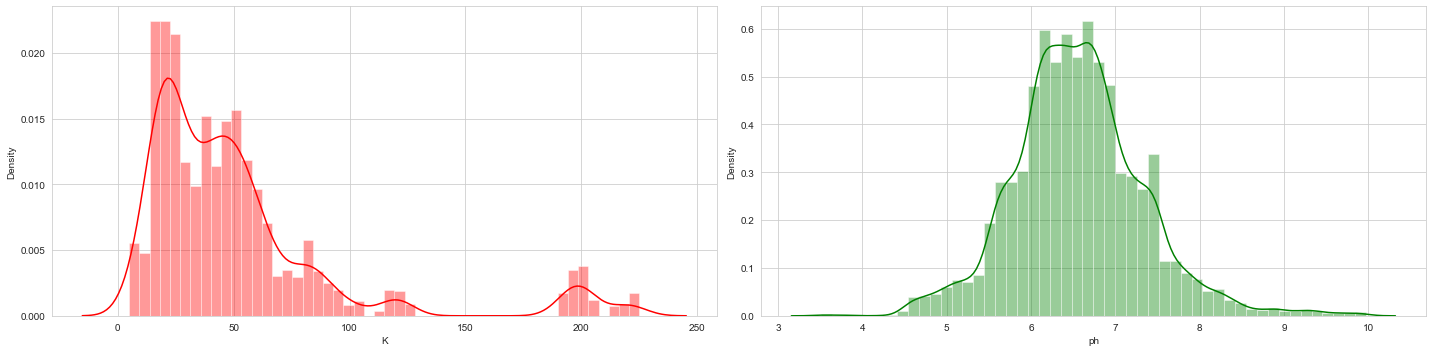

In [19]:
f = plt.figure(figsize=(20,5))
ax = f.add_subplot(1, 2, 1)
sns.distplot(data['K'] , color ='red', ax=ax)

ax = f.add_subplot(1, 2, 2)
sns.distplot(data['ph'] ,color ='green', ax = ax)
plt.tight_layout()

- K data: Most values between 20-75 kg/hectare
- pH: pH values show normal distribution with maximum values between 5.5-7.5

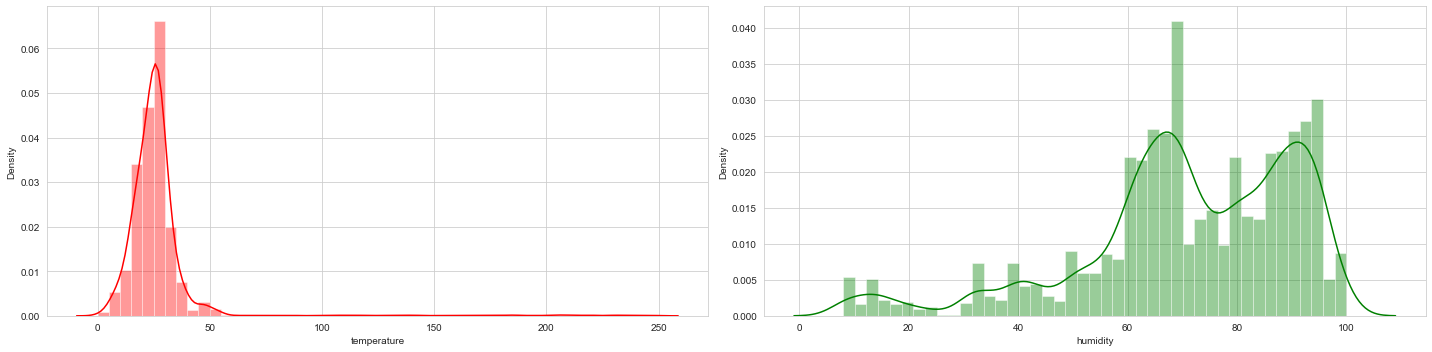

In [20]:
f = plt.figure(figsize=(20,5))
ax = f.add_subplot(1, 2, 1)
sns.distplot(data['temperature'] , color ='red', ax=ax)

ax = f.add_subplot(1, 2, 2)
sns.distplot(data['humidity'] ,color ='green', ax = ax)
plt.tight_layout()

- temperature: data is left skewed with most values between 10-48 degree celcius
- humidity: data is slighlty right skewed with most values between 60-95 %. So most of the crops in our dataset need more humidity for growth.

<AxesSubplot:xlabel='rainfall', ylabel='Density'>

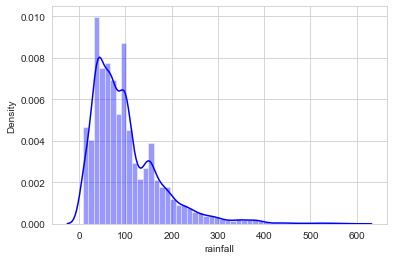

In [21]:
sns.distplot(data['rainfall'], color ='blue')

- rainfall: rainfall data mostly has values between 20-200 cm.

In [ ]:
report = pandas_profiling.ProfileReport(data)
report.to_widgets()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

As we can see the profiling is also giving us same results:
1. All features are important for crop recommendation.
2. N is highly correlated with K.
2. P is highly correlated with K.
3. Hence, K is highly correlated with N and P.
4. Temperature has some amount of correlation with humidity.
5. We don't have any null/missing values
